# **Load Data**

In [12]:
#Install the readr package
install.packages("readr")

#Load the readr library
library(readr)

#Read the CSV file using readr
data <- read_csv("cleaned_dataset-2.csv")

#Display the first few rows of the dataset
print(head(data))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Rows: 2126 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (7): age, sex, bmi, children, smoker, region, expenses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 7
    age   sex   bmi children smoker region expenses
  <dbl> <dbl> <dbl>    <dbl>  <dbl>  <dbl>    <dbl>
1    21     0  21.9        2      0      2    3181.
2    28     1  36.4        1      1      3   51195.
3    19     0  27.9        0      1      3   16885.
4    58     0  28.2        0      0      1   12224.
5    22     1  35.6        0      1      3   35586.
6    19     1  34.4        0      0      3    1262.


# **Linear** **Regression**

In [17]:
install.packages("caret")
library(caret)

# Define the feature variables (X) and the target variable (y)
X <- data[, !(names(data) %in% c("expenses"))]
y <- data$expenses

# Split the data into training and testing sets
set.seed(42)  # For reproducibility
train_indices <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_indices, ]
X_test <- X[-train_indices, ]
y_train <- y[train_indices]
y_test <- y[-train_indices]

cat("Training set size:", nrow(X_train), "\n")
cat("Testing set size:", nrow(X_test), "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Training set size: 1703 
Testing set size: 423 


Mean Squared Error: 45854679 
Mean Absolute Error: 5534.463 
R-Squared: 0.7969021 
R-Mean Squared Error: 6771.608 


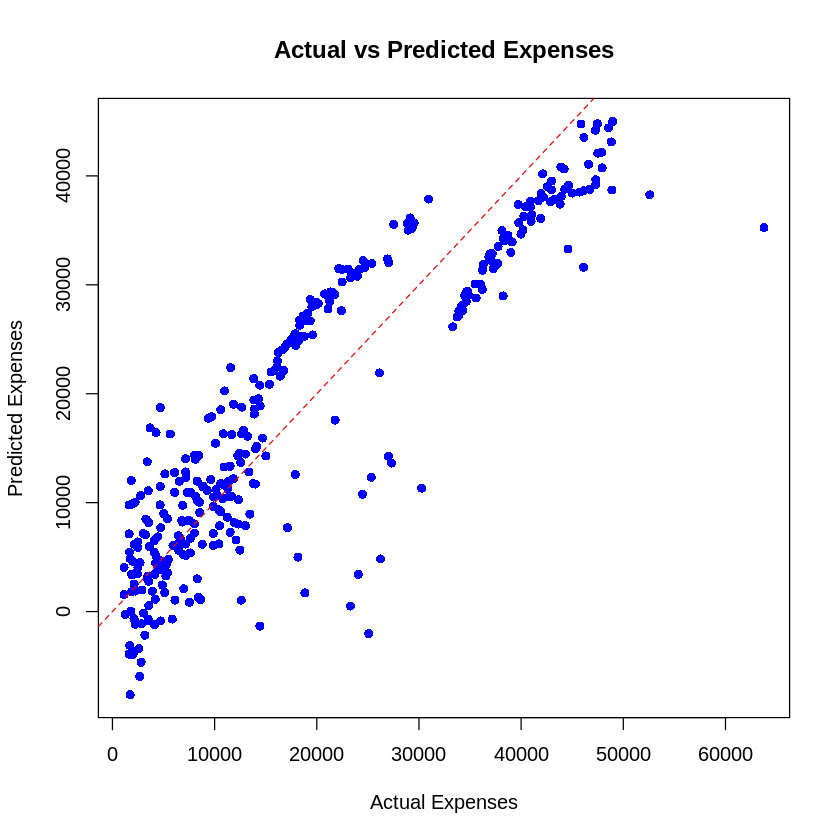

In [19]:
# Normalize the features (optional, but recommended)
X_train_scaled <- scale(X_train)
X_test_scaled <- scale(X_test)

# Convert the scaled matrices back to data frames
X_train_df <- as.data.frame(X_train_scaled)
X_test_df <- as.data.frame(X_test_scaled)

# Initialize the linear regression model
model <- lm(y_train ~ ., data = X_train_df)

# Make predictions on the test data
y_pred <- predict(model, newdata = X_test_df)

# Calculate the Mean Squared Error
mse <- mean((y_test - y_pred)^2)

# Calculate the Mean Absolute Error
mae <- mean(abs(y_test - y_pred))

# Calculate the R-squared value
r2 <- 1 - sum((y_test - y_pred)^2) / sum((y_test - mean(y_test))^2)

# Calculate the R-Mean Squared Error value
rmse <- sqrt(mse)


cat("Mean Squared Error:", mse, "\n")
cat("Mean Absolute Error:", mae, "\n")
cat("R-Squared:", r2, "\n")
cat("R-Mean Squared Error:", rmse, "\n")

# Visualize the comparison between actual and predicted values
plot(y_test, y_pred, col = "blue", pch = 16, xlab = "Actual Expenses", ylab = "Predicted Expenses",
     main = "Actual vs Predicted Expenses")
abline(a = 0, b = 1, col = "red", lty = 2)

Based on the values, the model’s predictions have substantial errors (high MSE and MAE), but it explains about 70% of the variance in insurance expenses (R-squared of 0.70).

In [21]:
# Fit the linear regression model
model <- lm(y ~ ., data = X)

# Get the coefficients (feature importance)
coefficients <- coef(model)

# Create a data frame to display the feature importance
importance <- data.frame(Feature = names(coefficients), Coefficient = coefficients)

# Print the top 5 most important factors
top_5_factors <- importance[order(abs(importance$Coefficient), decreasing = TRUE), ][1:6, ]
print("Top 5 Important Factors:")
print(top_5_factors)

[1] "Top 5 Important Factors:"
                Feature Coefficient
(Intercept) (Intercept) -25399.5843
smoker           smoker  23982.6248
bmi                 bmi    762.8303
children       children    403.9645
sex                 sex   -268.9762
age                 age    264.7750
